In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import sys
from datetime import datetime, timedelta
from geopy.distance import geodesic

In [2]:
all = pd.read_csv("./data/wholetime.csv")

/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_4226/1049815730.py:1: DtypeWarning: Columns (2,10) have mixed types. Specify dtype option on import or set low_memory=False.
  all = pd.read_csv("./data/wholetime.csv")


In [3]:
# start_lat_lngとend_lat_lngを小数点第5位までに丸める
# それぞれの値は緯度と経度を組み合わせたタプル
# それぞれをfloatに変換してから丸める
all['start_lat_lng'] = all['start_lat_lng'].apply(lambda x: tuple(map(float, x[1:-1].split(', '))))
all['end_lat_lng'] = all['end_lat_lng'].apply(lambda x: tuple(map(float, x[1:-1].split(', '))))
all['start_lat_lng'] = all['start_lat_lng'].apply(lambda x: tuple(map(lambda y: round(y, 5), x)))
all['end_lat_lng'] = all['end_lat_lng'].apply(lambda x: tuple(map(lambda y: round(y, 5), x)))

In [4]:
all.head()

,end_lat,end_lng,end_station_id,end_station_name,ended_at,member_casual,ride_id,rideable_type,start_lat,start_lng,start_station_id,start_station_name,started_at,distance,start_lat_lng,end_lat_lng
0,41.9322,-87.6586,152.0,Lincoln Ave & Diversey Pkwy,2020-04-26 18:12:03,member,A847FADBBC638E45,docked_bike,41.8964,-87.6610,86,Eckhart Park,2020-04-26 17:45:14,3.981346,"(41.8964, -87.661)","(41.9322, -87.6586)"
1,41.9306,-87.7238,499.0,Kosciuszko Park,2020-04-17 17:17:03,member,5405B80E996FF60D,docked_bike,41.9244,-87.7154,503,Drake Ave & Fullerton Ave,2020-04-17 17:08:54,0.979629,"(41.9244, -87.7154)","(41.9306, -87.7238)"
2,41.8679,-87.6230,255.0,Indiana Ave & Roosevelt Rd,2020-04-01 18:08:36,member,5DD24A79A4E006F4,docked_bike,41.8945,-87.6179,142,McClurg Ct & Erie St,2020-04-01 17:54:13,2.984661,"(41.8945, -87.6179)","(41.8679, -87.623)"
3,41.8992,-87.6722,657.0,Wood St & Augusta Blvd,2020-04-07 13:02:31,member,2A59BBDF5CDBA725,docked_bike,41.9030,-87.6975,216,California Ave & Division St,2020-04-07 12:50:19,2.141375,"(41.903, -87.6975)","(41.8992, -87.6722)"
4,41.9695,-87.6547,323.0,Sheridan Rd & Lawrence Ave,2020-04-18 11:15:54,casual,27AD306C119C6158,docked_bike,41.8902,-87.6262,125,Rush St & Hubbard St,2020-04-18 10:22:59,9.119685,"(41.8902, -87.6262)","(41.9695, -87.6547)"


In [14]:
# start_lat_lngをユニークなものだけで抽出
all_edited = all.drop_duplicates(subset=["start_lat_lng"])
all_edited.sample(10)

,end_lat,end_lng,end_station_id,end_station_name,ended_at,member_casual,ride_id,rideable_type,start_lat,start_lng,start_station_id,start_station_name,started_at,distance,start_lat_lng,end_lat_lng
16519306,41.894634,-87.634206,TA1306000012,Wells St & Huron St,2021-10-20 12:10:35,member,70B53D2E8D857890,electric_bike,41.890319,-87.634337,TA1307000151,Wells St & Hubbard St,2021-10-20 12:07:33,0.479396,"(41.89032, -87.63434)","(41.89463, -87.63421)"
2312032,41.950911,-87.659173,165.0,Clark St & Grace St,2020-09-03 16:32:41,casual,FFF52D06AD36C1E3,electric_bike,41.910446,-87.697094,276.0,California Ave & North Ave,2020-09-03 16:03:56,5.485631,"(41.91045, -87.69709)","(41.95091, -87.65917)"
1733419,41.883977,-87.624272,43.0,Michigan Ave & Washington St,2020-08-26 20:25:43,casual,20CD59C7496FE9EC,electric_bike,41.893924,-87.629548,110.0,Dearborn St & Erie St,2020-08-26 18:26:58,1.188448,"(41.89392, -87.62955)","(41.88398, -87.62427)"
13569789,41.886650,-87.630655,KA1503000012,Clark St & Lake St,2021-09-18 23:15:51,member,D6CE2DF63B915487,electric_bike,41.890616,-87.621893,13427,Cityfront Plaza Dr & Pioneer Ct,2021-09-18 23:11:40,0.850211,"(41.89062, -87.62189)","(41.88665, -87.63065)"
15287755,41.879038,-87.636002,TA1309000008,Franklin St & Adams St (Temp),2021-07-08 17:15:02,member,008C0549EB5A8BE2,electric_bike,41.885123,-87.626861,TA1305000011,Michigan Ave & Lake St,2021-07-08 17:03:08,1.016131,"(41.88512, -87.62686)","(41.87904, -87.636)"
2740112,41.680000,-87.690000,NaN,NaN,2020-11-07 03:57:57,casual,508579C6C3F25368,electric_bike,41.699250,-87.668875,723.0,Hale Ave & 107th St,2020-11-07 03:44:22,2.768482,"(41.69925, -87.66887)","(41.68, -87.69)"
3666539,41.895748,-87.620104,18003,Fairbanks St & Superior St,2022-03-30 07:07:12,casual,9B4A26B962F0A00E,electric_bike,41.877766,-87.635506,TA1305000025,Franklin St & Jackson Blvd,2022-03-30 06:56:56,2.371316,"(41.87777, -87.63551)","(41.89575, -87.6201)"
16909535,42.032689,-87.679291,E002,Chicago Ave & Washington St,2021-06-29 19:38:27,member,740D7889265E79D5,electric_bike,42.034882,-87.699221,E011,Dodge Ave & Main St,2021-06-29 19:32:41,1.668232,"(42.03488, -87.69922)","(42.03269, -87.67929)"
2635595,41.893600,-87.622644,211.0,St. Clair St & Erie St,2020-10-15 07:11:18,member,99D6B4292BA28B17,electric_bike,41.864077,-87.623720,168.0,Michigan Ave & 14th St,2020-10-15 07:02:49,3.280402,"(41.86408, -87.62372)","(41.8936, -87.62264)"
11443045,41.870769,-87.625734,TA1309000010,Wabash Ave & 9th St,2023-07-27 06:56:32,member,7FEF2CC18E79F8CD,electric_bike,41.882107,-87.625444,13036,Michigan Ave & Madison St,2023-07-27 06:52:59,1.259534,"(41.88211, -87.62544)","(41.87077, -87.62573)"


In [15]:
# start_lat_lngを昇順にソートして出力
all_edited = all_edited.sort_values(by=["start_lat_lng"])
all_edited.head()

,end_lat,end_lng,end_station_id,end_station_name,ended_at,member_casual,ride_id,rideable_type,start_lat,start_lng,start_station_id,start_station_name,started_at,distance,start_lat_lng,end_lat_lng
12832313,41.74,-87.58,NaN,NaN,2023-08-10 06:17:51,member,88B77C61B9BB6A92,electric_bike,41.63,-87.46,NaN,NaN,2023-08-10 05:15:36,15.782396,"(41.63, -87.46)","(41.74, -87.58)"
14313783,41.64,-87.69,NaN,NaN,2021-04-29 02:15:21,casual,F1C012CFCF3EE680,electric_bike,41.64,-87.69,NaN,NaN,2021-04-29 01:10:17,0.000000,"(41.64, -87.69)","(41.64, -87.69)"
3182404,41.66,-87.65,NaN,NaN,2021-01-30 15:27:26,casual,C2A22C4428008FF2,electric_bike,41.64,-87.62,NaN,NaN,2021-01-30 14:05:52,3.343619,"(41.64, -87.62)","(41.66, -87.65)"
16000711,41.70,-87.63,NaN,NaN,2021-12-16 15:04:05,member,FC8DD0BF7A1EF000,electric_bike,41.64,-87.60,NaN,NaN,2021-12-16 14:33:43,7.116929,"(41.64, -87.6)","(41.7, -87.63)"
2357187,41.66,-87.55,NaN,NaN,2020-10-26 23:00:09,casual,3A88C02EF151F2BB,electric_bike,41.64,-87.54,NaN,NaN,2020-10-26 22:51:51,2.372393,"(41.64, -87.54)","(41.66, -87.55)"


In [5]:
# Get the node_list, edge_list and timestamp
def return_nm(df):
    df['started_at'] = pd.to_datetime(df['started_at'])
    df['ended_at'] = pd.to_datetime(df['ended_at'])
    # started_atで昇順にソート
    df = df.sort_values(by='started_at')
    current_timestamp = df['started_at'].min()
    end_timestamp = df["started_at"].max()
    interval = timedelta(days=1)

    node_list = []
    edge_list = []
    timestamp = []

    while current_timestamp <= end_timestamp:
        timestamp.append(current_timestamp)
        next_timestamp = current_timestamp + interval
        df_tmp = df[(df['started_at'] >= current_timestamp) & (df['started_at'] < next_timestamp)]

        # node_listにはユニークなstart_station_idを追加
        node_list.append(len(df_tmp['start_station_id'].unique()))

        # edge_listにはdf_tmpの行数を追加
        edge_list.append(len(df_tmp))

        current_timestamp = next_timestamp

    return node_list, edge_list, timestamp

In [6]:
all_nmt = return_nm(all)
all_nmt

([447,
  468,
  485,
  437,
  465,
  455,
  505,
  446,
  431,
  447,
  471,
  463,
  420,
  413,
  406,
  435,
  381,
  480,
  498,
  483,
  457,
  437,
  445,
  444,
  328,
  510,
  441,
  476,
  281,
  463,
  500,
  545,
  526,
  451,
  414,
  501,
  499,
  464,
  504,
  378,
  467,
  499,
  521,
  459,
  520,
  525,
  294,
  491,
  461,
  510,
  513,
  520,
  519,
  533,
  539,
  523,
  539,
  530,
  543,
  545,
  106,
  0,
  0,
  518,
  517,
  524,
  541,
  548,
  547,
  523,
  525,
  541,
  548,
  543,
  550,
  546,
  547,
  543,
  550,
  547,
  536,
  535,
  519,
  547,
  550,
  558,
  517,
  553,
  552,
  534,
  553,
  550,
  572,
  565,
  561,
  556,
  563,
  559,
  562,
  566,
  559,
  561,
  566,
  570,
  569,
  554,
  565,
  560,
  563,
  545,
  568,
  554,
  560,
  571,
  566,
  564,
  563,
  552,
  567,
  559,
  573,
  583,
  565,
  552,
  565,
  582,
  569,
  566,
  565,
  581,
  568,
  548,
  569,
  573,
  576,
  580,
  573,
  583,
  574,
  578,
  579,
  575,
  577,
  5

In [6]:
all_sample = all.sample(100)
all_sample.head()

,end_lat,end_lng,end_station_id,end_station_name,ended_at,member_casual,ride_id,rideable_type,start_lat,start_lng,start_station_id,start_station_name,started_at,distance,start_lat_lng,end_lat_lng
8481382,41.940232,-87.652944,TA1307000134,Wilton Ave & Belmont Ave,2022-11-02 21:05:41,member,A1E4761FBCC4C4F6,classic_bike,41.931248,-87.644336,TA1307000142,Clark St & Drummond Pl,2022-11-02 20:57:52,1.226925,"(41.931248, -87.644336)","(41.940231918108594, -87.65294373035431)"
4294381,41.893992,-87.629318,13045,Dearborn St & Erie St,2022-05-27 17:08:57,casual,AFE2F17962BC621B,classic_bike,41.892278,-87.612043,13022,Streeter Dr & Grand Ave,2022-05-27 15:46:06,1.446224,"(41.892278, -87.612043)","(41.893992, -87.629318)"
14839175,41.907655,-87.672552,13221,Wood St & Milwaukee Ave,2021-07-08 14:41:50,casual,3ADB43D2CB4AE78D,classic_bike,41.907066,-87.667252,13224,Ashland Ave & Blackhawk St,2021-07-08 14:38:03,0.444585,"(41.907066, -87.667252)","(41.907655, -87.672552)"
6297520,41.961507,-87.671387,TA1309000021,Paulina St & Montrose Ave,2022-07-26 23:27:48,member,5D40FEFFAD98690D,electric_bike,41.966694,-87.708078,KA1504000126,Kedzie Ave & Leland Ave,2022-07-26 23:19:00,3.095714,"(41.96669416666667, -87.7080785)","(41.961507, -87.671387)"
15658626,41.795264,-87.596471,TA1307000164,Woodlawn Ave & 55th St,2021-11-04 14:41:41,member,2508ECA8D3DC8679,classic_bike,41.785097,-87.601073,KA1503000014,Ellis Ave & 60th St,2021-11-04 14:34:18,1.192250,"(41.78509714636, -87.6010727606)","(41.795264, -87.596471)"


In [7]:
"""
Test code
"""
all_sample['started_at'] = pd.to_datetime(all_sample['started_at'])
all_sample['ended_at'] = pd.to_datetime(all_sample['ended_at'])

In [8]:
# started_atで昇順にソート
all_sample = all_sample.sort_values(by='started_at')
current_timestamp = all_sample['started_at'].min()
end_timestamp = all_sample["started_at"].max()
interval = timedelta(days=1)

In [9]:
node_list = []
edge_list = []  
timestamp = []

In [10]:
while current_timestamp <= end_timestamp:
    timestamp.append(current_timestamp)
    next_timestamp = current_timestamp + interval
    df_tmp = all_sample[(all_sample['started_at'] >= current_timestamp) & (all_sample['started_at'] < next_timestamp)]

    # node_listにはユニークなstart_station_idを追加
    node_list.append(len(df_tmp['start_station_id'].unique()))

    # edge_listにはdf_tmpの行数を追加
    edge_list.append(len(df_tmp))

    current_timestamp = next_timestamp


In [13]:
def return_nm(df):
    df['started_at'] = pd.to_datetime(df['started_at'])
    df['ended_at'] = pd.to_datetime(df['ended_at'])
    # started_atで昇順にソート
    df = df.sort_values(by='started_at')
    current_timestamp = df['started_at'].min()
    end_timestamp = df["started_at"].max()
    interval = timedelta(days=1)

    node_list = []
    edge_list = []
    timestamp = []

    while current_timestamp <= end_timestamp:
        timestamp.append(current_timestamp)
        next_timestamp = current_timestamp + interval
        df_tmp = df[(df['started_at'] >= current_timestamp) & (df['started_at'] < next_timestamp)]

        # node_listにはユニークなstart_station_idを追加
        node_list.append(len(df_tmp['start_station_id'].unique()))

        # edge_listにはdf_tmpの行数を追加
        edge_list.append(len(df_tmp))

        current_timestamp = next_timestamp

    return node_list, edge_list, timestamp

In [14]:
all_nmt = return_nm(all)

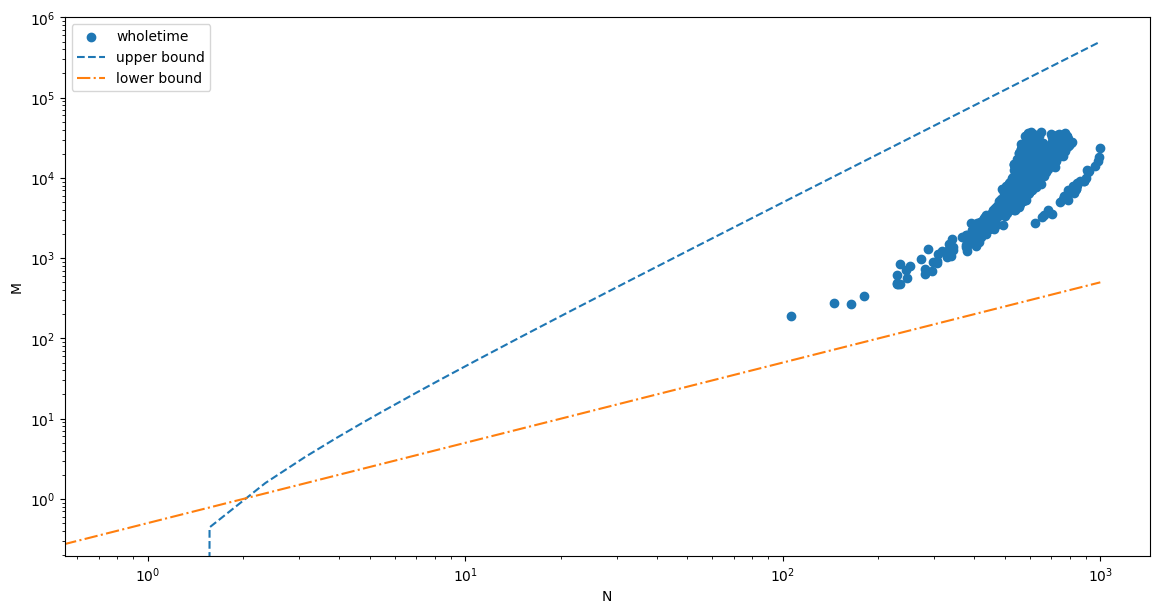

In [18]:
# node_list, edge_list, timestampをそれぞれ変数に代入
node_list = all_nmt[0]
edge_list = all_nmt[1]
timestamp = all_nmt[2]

nn = len(node_list)
xmin = min(node_list)
xmax = max(node_list)
p = np.linspace(xmin, xmax, nn)
upper_bound = (p**2-p)/2
lower_bound = p/2

# node_listとedge_listをプロット
plt.figure(figsize=(14, 7))
plt.scatter(node_list, edge_list, label="wholetime")
plt.plot(p, upper_bound, '--', label="upper bound")
plt.plot(p, lower_bound, '-.', label="lower bound")
plt.xlabel("N")
plt.ylabel("M")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()



/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_99972/2064633963.py:3: RuntimeWarning: invalid value encountered in sqrt
  a = (1+np.sqrt(1+(32*x/kappa)))/2


kappa: 2.0219269851912182e-05


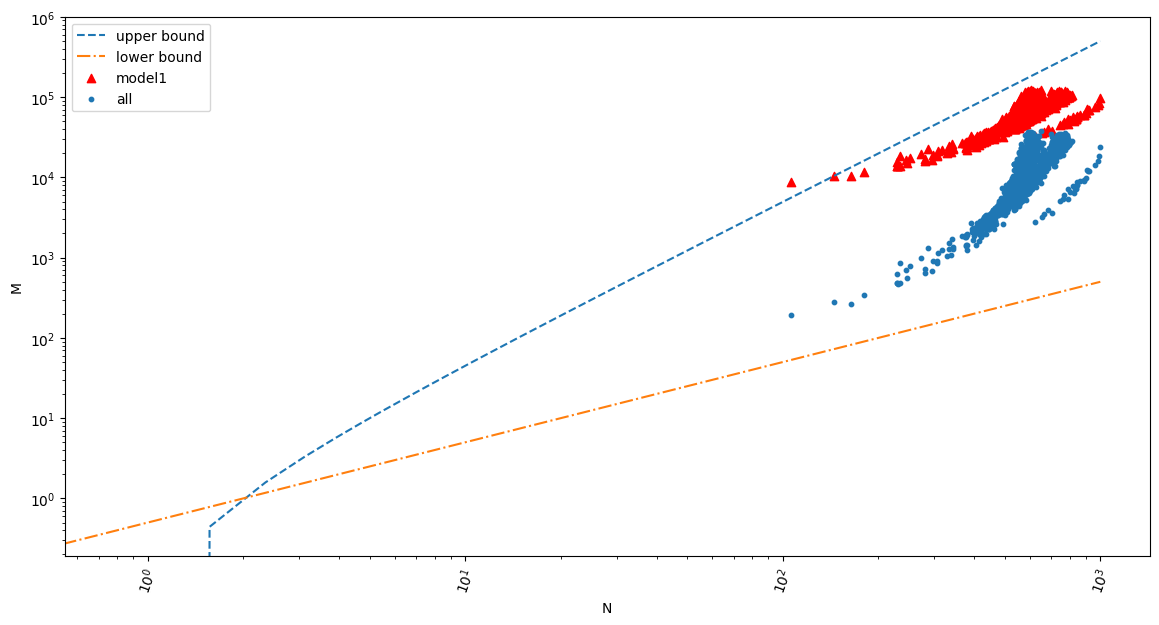

In [19]:
from scipy.optimize import curve_fit
def model1(x, kappa):
    a = (1+np.sqrt(1+(32*x/kappa)))/2
    return a*(1-2/a*kappa*(1-(1-kappa/2)**a))


# フィッティングする
popt, pcov = curve_fit(model1,node_list,edge_list)
kappa = popt[0]
print("kappa:", kappa)

# Npを求める
Np = []
for i in range(len(edge_list)):
    Np.append((1+np.sqrt(1+32*edge_list[i]/kappa))/2)

plt.figure(figsize=(14,7))
plt.plot(p, upper_bound, '--', label="upper bound")
plt.plot(p, lower_bound, '-.', label="lower bound")
# 縦軸にNp, 横軸にNをとる
plt.scatter(node_list, Np, label="model1", marker="^", c="red")
plt.scatter(node_list, edge_list, label="all", marker="o", s=10)
plt.xticks(rotation=70)
plt.xlabel("N")
plt.ylabel("M")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_99972/747282716.py:2: RuntimeWarning: divide by zero encountered in divide
  a = 8*x/(Np**2-Np)
/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_99972/747282716.py:2: RuntimeWarning: invalid value encountered in divide
  a = 8*x/(Np**2-Np)
/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_99972/747282716.py:3: RuntimeWarning: invalid value encountered in multiply
  return Np-2/a*(1-(1-(a/2)**Np))
/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_99972/747282716.py:3: RuntimeWarning: divide by zero encountered in divide
  return Np-2/a*(1-(1-(a/2)**Np))
/Users/ykaida/dev/chicago_master/venv/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_99972/747282716.py:14: RuntimeWarning: divide by zero

Np: 1.0


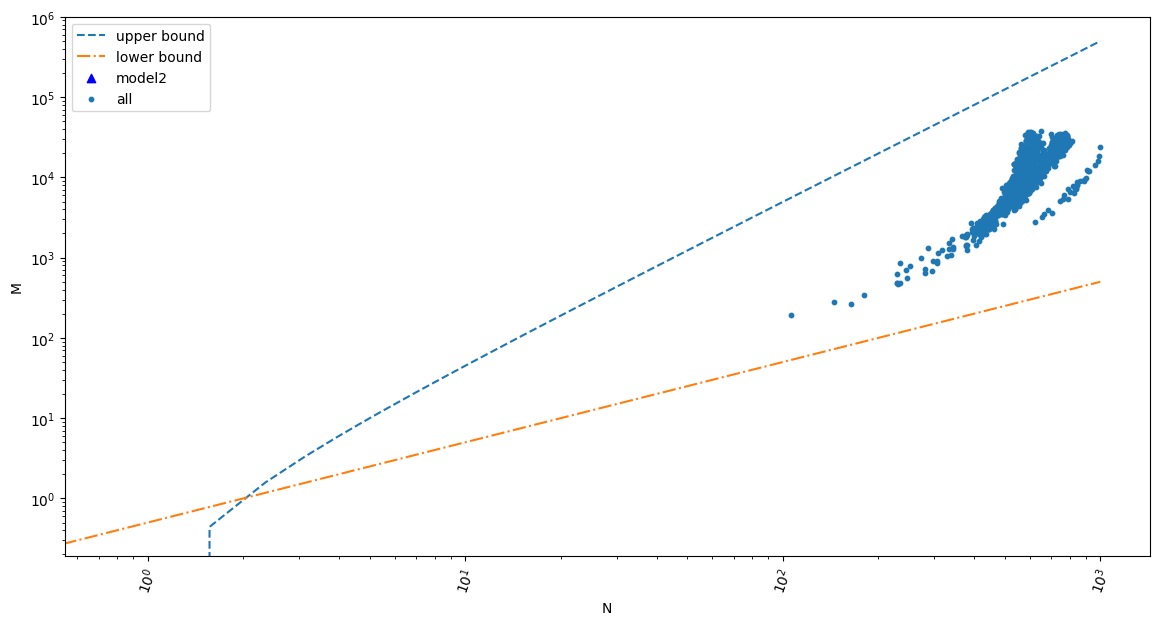

In [23]:
def model2(x, Np):
    a = 8*x/(Np**2-Np)
    return Np-2/a*(1-(1-(a/2)**Np))


# フィッティングする
params, cov = curve_fit(model2, node_list, edge_list)
Np = params[0]
print("Np:", params[0])

# kappaを求める
kappa = []
for i in range(len(edge_list)):
    kappa.append(8*edge_list[i]/(Np**2-Np))

plt.figure(figsize=(14,7))
plt.plot(p, upper_bound, '--', label="upper bound")
plt.plot(p, lower_bound, '-.', label="lower bound")
# 縦軸にNp, 横軸にNをとる
plt.scatter(node_list, kappa, label="model2", marker="^", c="blue")
plt.scatter(node_list, edge_list, label="all", marker="o", s=10)
plt.xticks(rotation=70)
plt.xlabel("N")
plt.ylabel("M")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

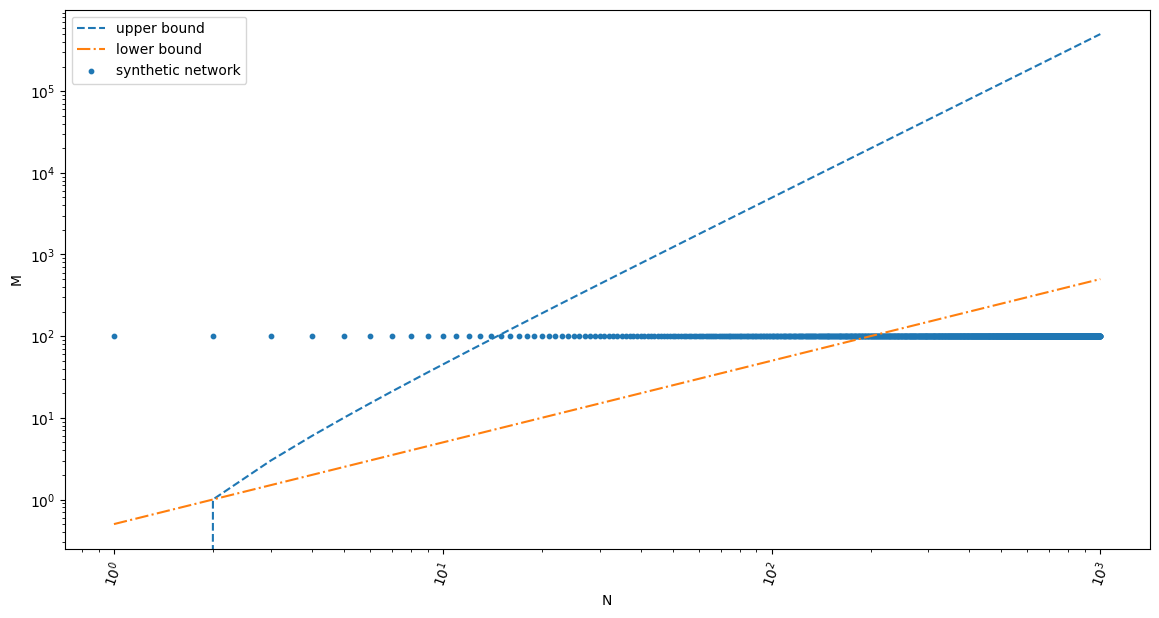

In [26]:
"""
model2nのテスト
"""

def model2test(x, Np):
    a = 8*x/(Np**2-Np)
    try:
        return Np*(1-(2/(a*Np)*(1-(1-(a/2)**Np))))
    except ZeroDivisionError:
        return 0
    

# synthetic networkを作成
N = 1000
M = 10000
p = np.linspace(1, N, N)
upper_bound = (p**2-p)/2
lower_bound = p/2
Np = 100
kappa = 100
node_list = []
edge_list = []
for i in range(N):
    node_list.append(i)
    edge_list.append(model2test(i, Np))

plt.figure(figsize=(14,7))
plt.plot(p, upper_bound, '--', label="upper bound")
plt.plot(p, lower_bound, '-.', label="lower bound")
# 縦軸にNp, 横軸にNをとる
plt.scatter(node_list, edge_list, label="synthetic network", marker="o", s=10)
plt.xticks(rotation=70)
plt.xlabel("N")
plt.ylabel("M")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()



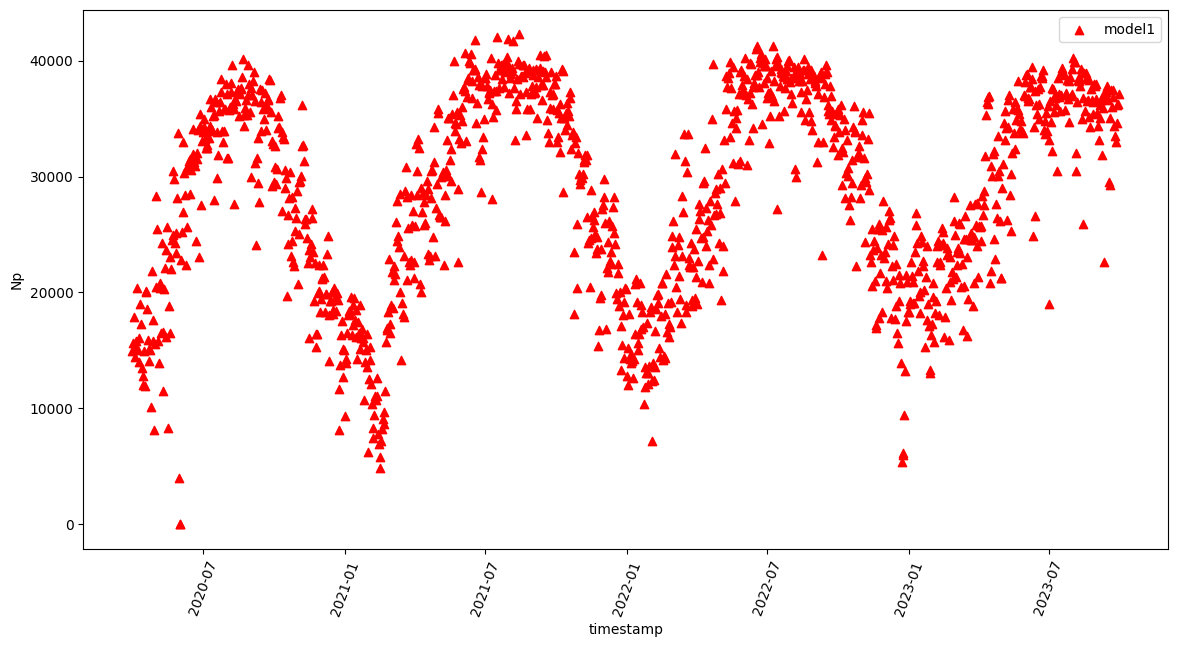

In [48]:
# timestampとNpをプロットする
plt.figure(figsize=(14,7))
plt.scatter(timestamp, Np, label="model1", marker="^", c="red")
plt.xticks(rotation=70)
plt.xlabel("timestamp")
plt.ylabel("Np")
plt.legend()
plt.show()


In [ ]:
"""model1再考

"""
p0 = [0.5, 0.9, -0.5, -0.9]
def model1(params, x, kappa):
    a = params[0]

/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_62312/1006076382.py:11: RuntimeWarning: invalid value encountered in divide
  return Np*(1-(Np-1)/(4*x)*(1-(1-16*x/(Np**2-Np))**Np))
/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_62312/1006076382.py:11: RuntimeWarning: divide by zero encountered in divide
  return Np*(1-(Np-1)/(4*x)*(1-(1-16*x/(Np**2-Np))**Np))
/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_62312/1006076382.py:11: RuntimeWarning: invalid value encountered in multiply
  return Np*(1-(Np-1)/(4*x)*(1-(1-16*x/(Np**2-Np))**Np))
/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_62312/1006076382.py:11: RuntimeWarning: invalid value encountered in power
  return Np*(1-(Np-1)/(4*x)*(1-(1-16*x/(Np**2-Np))**Np))
/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_62312/1006076382.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  kappa.append(8*M[i]/(Np**2-Np))
/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipyk

Np: 1.0


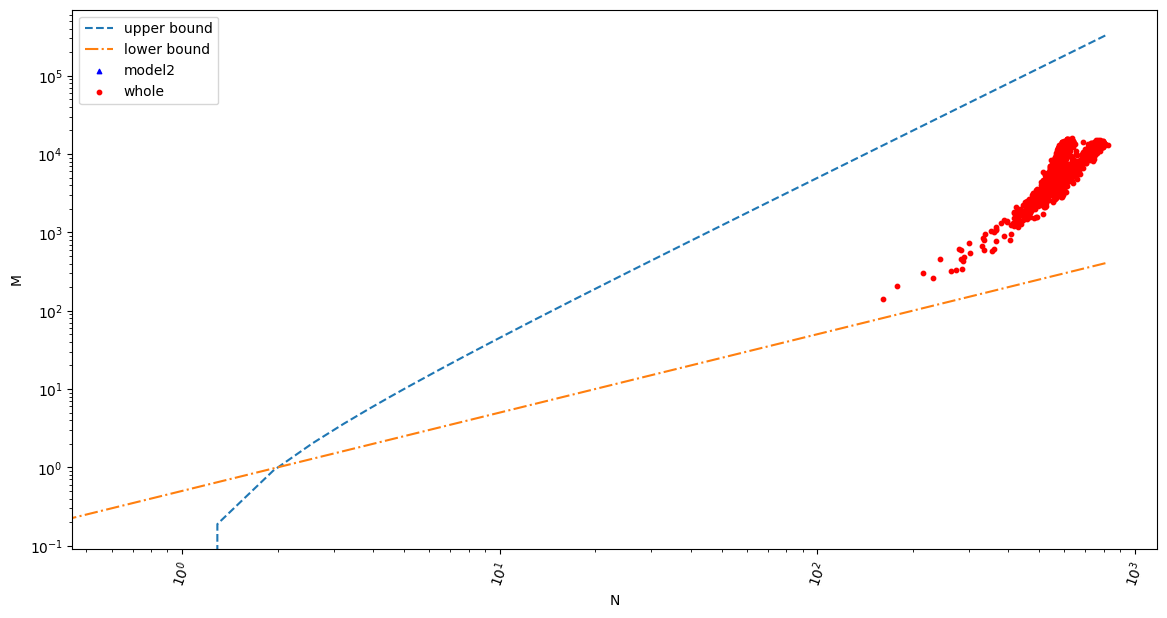

In [70]:
"""
model2を用いてフィッティング
Npは非線形最小二乗法で求める
κは可変、Npは定数
"""
p = np.linspace(xmin, xmax, nn)
upper_bound = (p**2-p)/2
lower_bound = p/2

def model2(x, Np, *params):
    return Np*(1-(Np-1)/(4*x)*(1-(1-16*x/(Np**2-Np))**Np))

# フィッティングする
# 初期値を設定する
p0 = [0.9, -0.9, -0.5, 0.5, 0.5, -0.5, -0.9, 0.9]
popt, pcov = curve_fit(model2,M,N)
Np = popt[0]
print("Np:", Np)

# kappaを求める
kappa = []
for i in range(len(M)):
    kappa.append(8*M[i]/(Np**2-Np))

plt.figure(figsize=(14,7))
plt.plot(p, upper_bound, '--', label="upper bound")
plt.plot(p, lower_bound, '-.', label="lower bound")
# 縦軸にNp, 横軸にNをとる
plt.scatter(N, kappa, label="model2", marker="^", c="blue", s=10)
plt.scatter(N, M, label="whole", marker="o", s=10, c="red")
plt.xticks(rotation=70)
plt.xlabel("N")
plt.ylabel("M")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()


In [7]:
# allを用いて時期で分けてカーネル密度推定を行う
# まずは時期を分ける
all['started_at'] = pd.to_datetime(all['started_at'])
all['ended_at'] = pd.to_datetime(all['ended_at'])
all = all.sort_values(by='started_at')

# 2020年3月~2020年5月
all_202003_202005 = all[(all['started_at'] >= '2020-03-01') & (all['started_at'] < '2020-06-01')]

# 2020年6月~2020年8月
all_202006_202008 = all[(all['started_at'] >= '2020-06-01') & (all['started_at'] < '2020-09-01')]

# 2020年9月~2020年11月
all_202009_202011 = all[(all['started_at'] >= '2020-09-01') & (all['started_at'] < '2020-12-01')]

# 2020年12月~2021年2月
all_202012_202102 = all[(all['started_at'] >= '2020-12-01') & (all['started_at'] < '2021-03-01')]

# 2021年3月~2023年9月
all_202103_202309 = all[(all['started_at'] >= '2021-03-01') & (all['started_at'] < '2023-10-01')]

/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_99972/125198809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['started_at'] = pd.to_datetime(df['started_at'])
/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_99972/125198809.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ended_at'] = pd.to_datetime(df['ended_at'])
/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_99972/125198809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

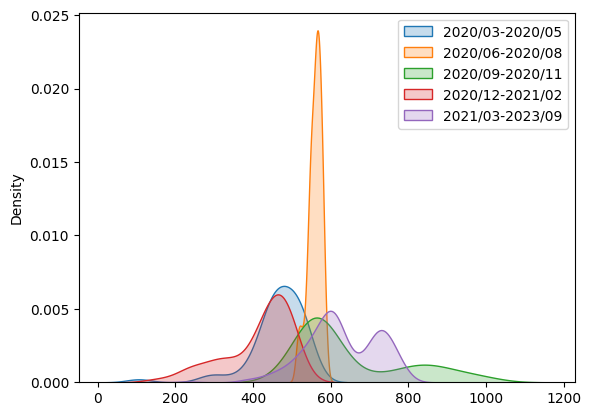

In [31]:
# 2020年3月~2020年5月のカーネル密度推定をseabornで行う
all_202003_202005_nmt = return_nm(all_202003_202005)

# 2020年6月~2020年8月のカーネル密度推定
all_202006_202008_nmt = return_nm(all_202006_202008)

# 2020年9月~2020年11月のカーネル密度推定
all_202009_202011_nmt = return_nm(all_202009_202011)

# 2020年12月~2021年2月のカーネル密度推定
all_202012_202102_nmt = return_nm(all_202012_202102)

# 2021年3月~2023年9月のカーネル密度推定
all_202103_202309_nmt = return_nm(all_202103_202309)

# node_list, edge_list, timestampをそれぞれ変数に代入
node_list_202003_202005 = all_202003_202005_nmt[0]
edge_list_202003_202005 = all_202003_202005_nmt[1]
timestamp_202003_202005 = all_202003_202005_nmt[2]
sns.kdeplot(node_list_202003_202005, shade=True, cmap='Reds', shade_lowest=False, label="2020/03-2020/05")

node_list_202006_202008 = all_202006_202008_nmt[0]
edge_list_202006_202008 = all_202006_202008_nmt[1]
timestamp_202006_202008 = all_202006_202008_nmt[2]
sns.kdeplot(node_list_202006_202008, shade=True, cmap='Reds', shade_lowest=False, label="2020/06-2020/08")

node_list_202009_202011 = all_202009_202011_nmt[0]
edge_list_202009_202011 = all_202009_202011_nmt[1]
timestamp_202009_202011 = all_202009_202011_nmt[2]
sns.kdeplot(node_list_202009_202011, shade=True, cmap='Reds', shade_lowest=False, label="2020/09-2020/11")

node_list_202012_202102 = all_202012_202102_nmt[0]
edge_list_202012_202102 = all_202012_202102_nmt[1]
timestamp_202012_202102 = all_202012_202102_nmt[2]
sns.kdeplot(node_list_202012_202102, shade=True, cmap='Reds', shade_lowest=False, label="2020/12-2021/02")

node_list_202103_202309 = all_202103_202309_nmt[0]
edge_list_202103_202309 = all_202103_202309_nmt[1]
timestamp_202103_202309 = all_202103_202309_nmt[2]
sns.kdeplot(node_list_202103_202309, shade=True, cmap='Reds', shade_lowest=False, label="2021/03-2023/09")
plt.legend()
plt.show()



In [32]:
max(node_list_202009_202011)

999

In [36]:
# Show the maximum number of nodes
print("max node number:", max(node_list_202003_202005))
print("max node number:", max(node_list_202009_202011))
print("max node number:", max(node_list_202012_202102))
print("max node number:", max(node_list_202103_202309))



max node number: 545
max node number: 999
max node number: 517
max node number: 813


In [45]:
distance_202003_202005 = all_202003_202005["distance"]
distance_202006_202008 = all_202006_202008["distance"]
distance_202009_202011 = all_202009_202011["distance"]
distance_202012_202102 = all_202012_202102["distance"]
distance_202103_202309 = all_202103_202309["distance"]
distance_202103_202309 = distance_202103_202309[distance_202103_202309 != 0]
distance_202103_202309 = distance_202103_202309[distance_202103_202309 < 50] 


,end_lat,end_lng,end_station_id,end_station_name,ended_at,member_casual,ride_id,rideable_type,start_lat,start_lng,start_station_id,start_station_name,started_at,distance,start_lat_lng,end_lat_lng
3484622,41.869265,-87.673731,13285,Wood St & Taylor St (Temp),2021-03-01 02:27:06,casual,A4F3120AD663324C,classic_bike,41.877642,-87.649618,13158,Peoria St & Jackson Blvd,2021-03-01 00:01:09,2.207385,"(41.8776415962753, -87.64961779117584)","(41.869265218438194, -87.67373085021973)"
3339587,42.018924,-87.690003,527,Western Ave & Howard St,2021-03-01 00:06:28,member,30B35AAB2C588648,electric_bike,42.018952,-87.690029,527,Western Ave & Howard St,2021-03-01 00:05:42,0.003737,"(42.018951666666666, -87.69002866666666)","(42.018924166666665, -87.69000266666667)"
3300910,41.853085,-87.631931,13075,Wentworth Ave & Cermak Rd,2021-03-01 00:27:05,member,CE1DDE1F3CAD840D,classic_bike,41.890762,-87.631697,13430,LaSalle St & Illinois St,2021-03-01 00:07:08,4.184909,"(41.890762, -87.631697)","(41.85308455741279, -87.63193130493164)"
3436466,41.902862,-87.687068,13241,Western Ave & Division St,2021-03-01 00:17:32,member,1B78BFBE468E239E,electric_bike,41.903138,-87.673844,TA1305000034,Honore St & Division St,2021-03-01 00:11:26,1.097764,"(41.903138166666665, -87.67384383333334)","(41.902862166666665, -87.6870685)"
3323014,41.924691,-87.689286,15648,Campbell Ave & Fullerton Ave,2021-03-01 00:42:59,member,C2310B7A78A87BD2,electric_bike,42.018940,-87.690063,527,Western Ave & Howard St,2021-03-01 00:11:47,10.468711,"(42.01894016666667, -87.69006316666666)","(41.924691, -87.6892865)"


/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_4226/4130677711.py:2: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(distance_202003_202005, shade=True, cmap='Reds', shade_lowest=False, label="2020/03-2020/05")
/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_4226/4130677711.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(distance_202003_202005, shade=True, cmap='Reds', shade_lowest=False, label="2020/03-2020/05")
/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_4226/4130677711.py:5: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(distance_202006_202008, shade=True, cmap='Reds', shade_lowest

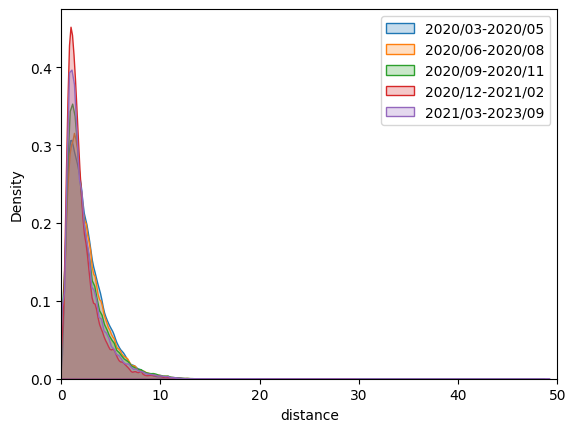

In [34]:
sns.kdeplot(distance_202003_202005, shade=True, cmap='Reds', shade_lowest=False, label="2020/03-2020/05")
sns.kdeplot(distance_202006_202008, shade=True, cmap='Reds', shade_lowest=False, label="2020/06-2020/08")
sns.kdeplot(distance_202009_202011, shade=True, cmap='Reds', shade_lowest=False, label="2020/09-2020/11")
sns.kdeplot(distance_202012_202102, shade=True, cmap='Reds', shade_lowest=False, label="2020/12-2021/02")
sns.kdeplot(distance_202103_202309, shade=True, cmap='Reds', shade_lowest=False, label="2021/03-2023/09")

plt.xlim(0, 50)
plt.legend()
plt.show()



/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_4226/1985158322.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True, label=label, bw_adjust=1.5)
/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_4226/1985158322.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True, label=label, bw_adjust=1.5)
/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_4226/1985158322.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True, label=label, bw_adjust=1.5)
/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_4226/1985158322.py:9: FutureWarning: 

`shade` is 

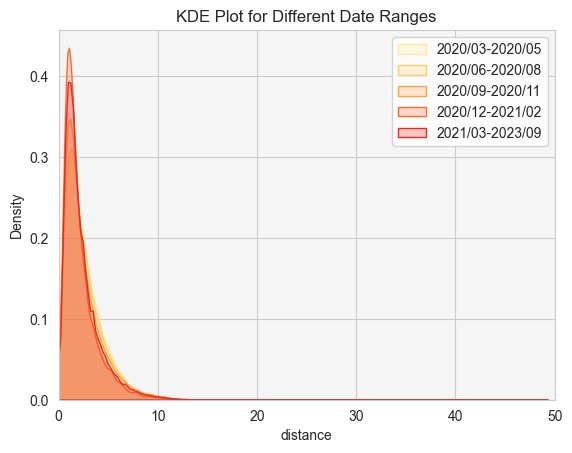

In [36]:
data_frames = [distance_202003_202005, distance_202006_202008, distance_202009_202011, distance_202012_202102, distance_202103_202309]

# グラフスタイルを設定
sns.set_style("whitegrid")
sns.set_palette("YlOrRd")

# グラフの作成
for data, label in zip(data_frames, ["2020/03-2020/05", "2020/06-2020/08", "2020/09-2020/11", "2020/12-2021/02", "2021/03-2023/09"]):
    sns.kdeplot(data, shade=True, label=label, bw_adjust=1.5)

# x軸の範囲を指定
plt.xlim(0, 50)

# 凡例を表示
plt.legend()

# グラフのタイトルを設定
plt.title("KDE Plot for Different Date Ranges")

# グラフの背景色をカスタマイズ
# ax = plt.gca()
# ax.set_facecolor('whitesmoke')

# グラフを表示
plt.show()

/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_4226/1286384012.py:7: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(distance_202103_202309, shade=True, cmap='Reds', shade_lowest=False, label="2021/03-2023/09")
/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_4226/1286384012.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(distance_202103_202309, shade=True, cmap='Reds', shade_lowest=False, label="2021/03-2023/09")


<Axes: xlabel='distance', ylabel='Density'>

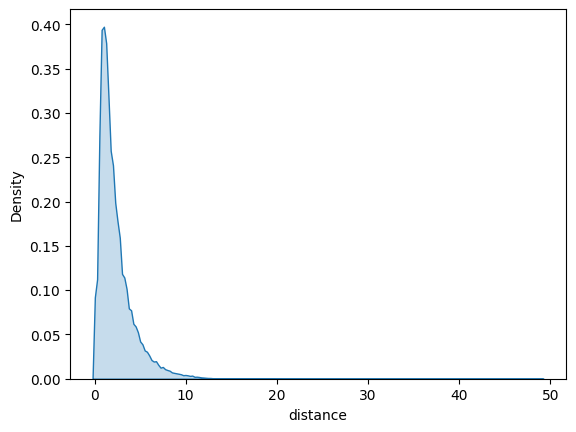

In [33]:
# distance_202203_202309をプロット
distance_202103_202309 = all_202103_202309["distance"]
# distanceが0のものを除外
# distanceの外れ値を除外
distance_202103_202309 = distance_202103_202309[distance_202103_202309 != 0]
distance_202103_202309 = distance_202103_202309[distance_202103_202309 < 50]    
sns.kdeplot(distance_202103_202309, shade=True, cmap='Reds', shade_lowest=False, label="2021/03-2023/09")



In [14]:
len(all_202003_202005["distance"] == 0)

284630